In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


<Axes: xlabel='balance', ylabel='income'>

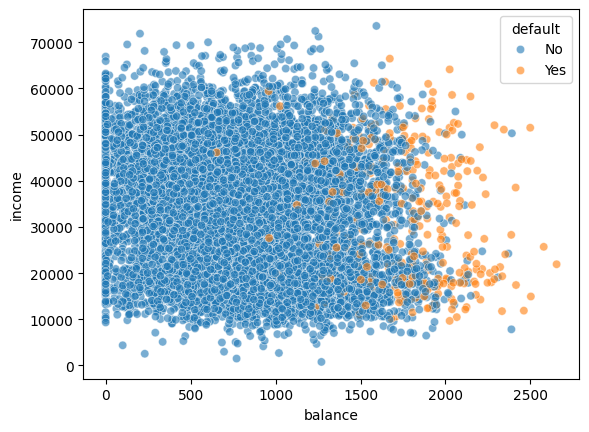

In [49]:
sns.scatterplot(x='balance', y='income', data=df, hue='default', alpha=0.6)

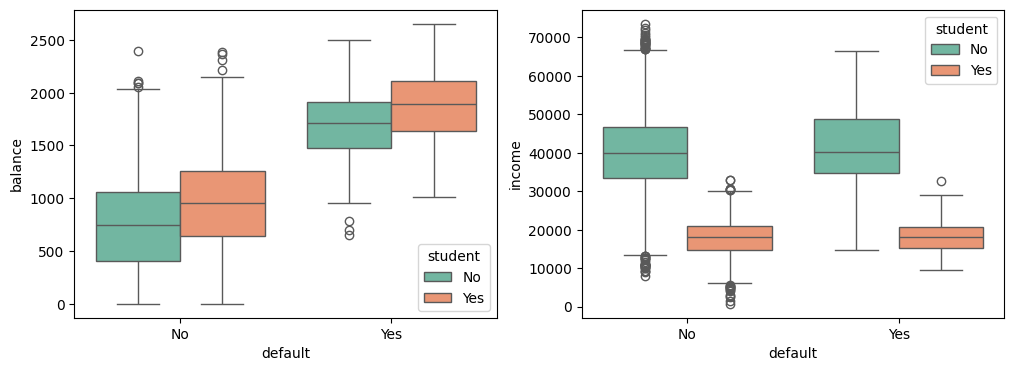

In [50]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

for ax, column in zip(ax, ['balance', 'income']):
    sns.boxplot(x='default', y=column, data=df, ax=ax, hue='student', palette='Set2')


In [51]:
df = pd.get_dummies(df, columns=['default', 'student'], dtype=int, drop_first=True)
df

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0
...,...,...,...,...
9995,711.555020,52992.378914,0,0
9996,757.962918,19660.721768,0,0
9997,845.411989,58636.156984,0,0
9998,1569.009053,36669.112365,0,0


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

X, Y = df.drop('default_Yes', axis="columns"), df['default_Yes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegressionCV(penalty='l2', cv=10, max_iter=10000, solver='lbfgs', random_state=42)
model.fit(scaled_X_train, Y_train)
model.intercept_, model.coef_

(array([-6.19131104]), array([[ 2.79774904,  0.0631535 , -0.22822624]]))

In [53]:
Y_hat = model.predict(scaled_X_test)

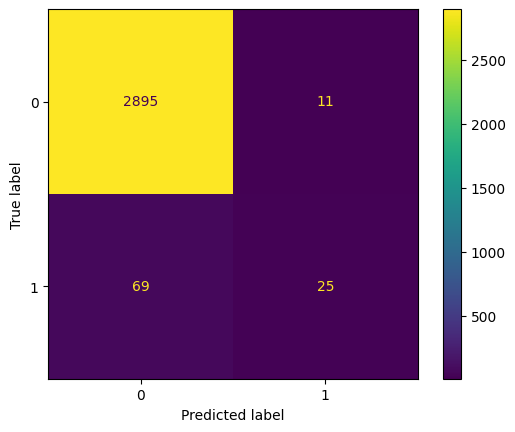

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_hat)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [55]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2906
           1       0.69      0.27      0.38        94

    accuracy                           0.97      3000
   macro avg       0.84      0.63      0.69      3000
weighted avg       0.97      0.97      0.97      3000

